# ENEL 645 - Assignment 2
## Adam Kerr - 10146363

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
import os

cwd = os.getcwd()
#os.environ["PATH"] += os.pathsep + 'D:/Documents/Software/graphviz-2.38/release/bin'
os.environ["PATH"] += os.pathsep + cwd + '\\graphviz-2.38\\release\\bin'

## Part I. Learning and data exploration with Decision Tree.
You are recommended to re-use the preprocessing code from Assignment 1 for step 1. Only
standardize the continuous variables, and replace the non-continuous variables with the original
data. You have implemented in assignment 1 the Naïve Bayes and Bayes nets. Note the different
methods will produce varied results based on your assumptions and learning approach to
determine the model.

### 1) Please download the “heart.csv’ file. Data preprocessing with pandas: From the tutorial, please modify the code to do the following.
#### a. Read the data from csv file.

In [3]:
df = pd.read_csv('heart.csv') 

#remove samples where chest pain = 4 (NaN in original data)
d = df['ca'] != 4
df = df[d]

#remove samples where thal = 0. (NaN in original data)
d2 = df['thal'] != 0
df = df[d2]

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### b. Read selected columns (attributes) and the label as attribute 14.

In [4]:
x = df.loc[:,:'thal']
y = df.loc[:,'target']

#### c. Form a numpy array

In [5]:
x = x.to_numpy()
y = y.to_numpy()

#### d. Split into training, testing sets with the data. Use 20% as the testing ratio. 

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
y_train = y_train.ravel()
y_test = y_test.ravel()

#### e. You do not need to standardize the data in decision tree, as shown from the tutorials and lectures, a decision tree advantage is that can be interpreted with raw attributes.
### 2) Implement the Decision Tree classifier.

In [7]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier(random_state=0)
dtc = dtc.fit(x_train, y_train)

### 3) Visualize the learned decision tree. (You may use the following visualization code, where clf is the trained classifier) Alternatively you can use the tree.plot_tree function and plt.show(), but it may be difficult to see with higher max_depth.

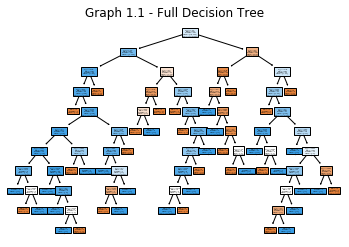

In [8]:
feature_names={0:'age',1:'sex',2:'cp',3:'trestbps',4:'chol',5:'fbs',6:'restecg',7:'thalach',8:'exang',9:'oldpeak',10:'slope',11:'ca',12:'thal'}
c_names={0: 'healthy', 1: 'heart_disease'}

tree.plot_tree(dtc, filled=True, class_names=c_names)
plt.title('Graph 1.1 - Full Decision Tree')
plt.show()


See **Appendix A** for a larger version of Graph 1.1

In [9]:
import graphviz
dot_data = tree.export_graphviz(dtc, out_file=None, feature_names=feature_names, class_names=c_names)
graph = graphviz.Source(dot_data)
graph.format='png'
graph.render("Graph_1.1")

'Graph_1.1.png'

### 4) Answer the following questions:
#### a. Interpretation of tree with depth
##### i. Examine the tree model visualization. One advantage of a tree is the ability to decipher “what this model is thinking”. From your visualization plot and model, for d=3 and d=5, trace from the root (first split of the tree) to a leaf resulting in conditions for heart disease.
###### 1. Draw or screenshot the tree for d=3 and d=5 and write down the path.

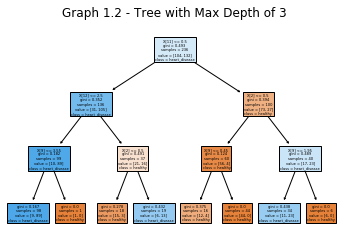

'Graph_1.2.png'

In [10]:
dtc = tree.DecisionTreeClassifier(max_depth=3, random_state=0) 
dtc = dtc.fit(x_train, y_train)

tree.plot_tree(dtc, filled=True, class_names=c_names)
plt.title('Graph 1.2 - Tree with Max Depth of 3')
plt.show()

dot_data = tree.export_graphviz(dtc, out_file=None, feature_names=feature_names, class_names=c_names)
graph = graphviz.Source(dot_data)
graph.format='png'
graph.render("Graph_1.2")

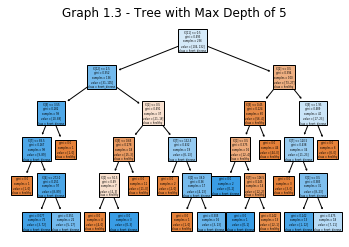

'Graph_1.3.png'

In [11]:
dtc = tree.DecisionTreeClassifier(max_depth=5, random_state=0) 
dtc = dtc.fit(x_train, y_train)

tree.plot_tree(dtc, filled=True, class_names=c_names)
plt.title('Graph 1.3 - Tree with Max Depth of 5')
plt.show()

dot_data = tree.export_graphviz(dtc, out_file=None, feature_names=feature_names, class_names=c_names)
graph = graphviz.Source(dot_data)
graph.format='png'
graph.render("Graph_1.3")

###### 2. (Path example: If patient has: [age>50 & cp<0.5&fbs < 0.5, ….] then heart disease)

Depth 3:
if [ca<=0.5 & thal<=2.5 & oldpeak<=3.55], then heart disease

Depth 5:
if [ca<=0.5 & thal<=2.5 & oldpeak<=3.55 & thalach>83.5 & chol <= 272.0], then heart disease

##### ii. Follow one specific path for d=3 which results in an impure leaf (non-zero Gini), and watch the growth to d=5. What are the Gini values as you traverse the tree from depth 3 to depth 5? 

[ca<=0.5 & thal<=2.5 & oldpeak<=3.55 & thalach>83.5 & chol > 272.0]

d=3, gini=0.167

d=4, gini=0.151

d=5, gini=0.351 

#### b. Accuracy and prediction with depth. Vary the depth of the tree from d=3 to d=12
##### i. Print the TRAINING accuracy and the TEST accuracy for each depth. Use the visualization and variables to guide your answer and explain why the accuracy changes with depth. 

In [12]:
def accuracy(incorrect, total):
    return (total - incorrect) / total * 100

num_test_points = y_test.shape[0]
num_train_points = y_train.shape[0]

tree_depth = []
incorrect_training = []
incorrect_testing = []
training_accuracy = []
testing_accuracy = []

for i in range(3,13):
    tree_depth.append(i)
    
    dtc = tree.DecisionTreeClassifier(max_depth=i, random_state=0) 
    dtc = dtc.fit(x_train, y_train)

    y_pred_train = dtc.predict(x_train)
    y_pred_test = dtc.predict(x_test)



    num_train_incorrect = (y_train != y_pred_train).sum()
    num_test_incorrect = (y_test != y_pred_test).sum()
    
    incorrect_training.append(num_train_incorrect)
    incorrect_testing.append(num_test_incorrect)
    
    training_accuracy.append(accuracy(num_train_incorrect, num_train_points))
    testing_accuracy.append(accuracy(num_test_incorrect, num_test_points))
    
    
d = {'tree_depth': tree_depth, 'incorrect_training': incorrect_training, 'training_accuracy' : training_accuracy, 
       'incorrect_testing' : incorrect_testing, 'testing_accuracy' : testing_accuracy }

accuracy_frame = pd.DataFrame(data=d)

print('Training points: %d, Testing points: %d' % (num_train_points, num_test_points))
accuracy_frame


Training points: 236, Testing points: 60


,tree_depth,incorrect_training,training_accuracy,incorrect_testing,testing_accuracy
0,3,33,86.016949,11,81.666667
1,4,25,89.406780,11,81.666667
2,5,20,91.525424,11,81.666667
3,6,18,92.372881,11,81.666667
4,7,10,95.762712,12,80.000000
5,8,8,96.610169,14,76.666667
6,9,2,99.152542,12,80.000000
7,10,0,100.000000,11,81.666667
8,11,0,100.000000,11,81.666667
9,12,0,100.000000,11,81.666667


##### ii. Determine the output probability of a patient with the following 13 attributes: X_patient = [57,0,1,130,236,0,0,174,0,0,1,1,2] 

In [13]:
x_patient = np.array([57,0,1,130,236,0,0,174,0,0,1,1,2]).reshape(1,-1)

tree_depth = []
prob_heart_disease = []
prob_healthy = []

for i in range(3,13):
    tree_depth.append(i)
    
    dtc = tree.DecisionTreeClassifier(max_depth=i, random_state=0)
    dtc = dtc.fit(x_train, y_train)

    pred = dtc.predict_proba(x_patient)
    
    prob_heart_disease.append(pred[0,0]*100)
    prob_healthy.append(pred[0,1]*100)

d = {'tree_depth': tree_depth, 'prob_heart_disease': prob_heart_disease, 'prob_healthy' : prob_healthy }

prediction_frame = pd.DataFrame(data=d)
prediction_frame

,tree_depth,prob_heart_disease,prob_healthy
0,3,32.352941,67.647059
1,4,25.806452,74.193548
2,5,7.692308,92.307692
3,6,0.000000,100.000000
4,7,0.000000,100.000000
5,8,0.000000,100.000000
6,9,0.000000,100.000000
7,10,0.000000,100.000000
8,11,0.000000,100.000000
9,12,0.000000,100.000000


##### iii. What is the depth, corresponding classification accuracy and confusion matrix that gives best test performance?

The best accuracy was at depths 3,4,5,6,10. Assuming that greater depth causes overfitting, the best model would be the one with the highest test accuracy at the shallowest depth. Therefore the best depth is 3.

Testing accuracy for depth 12: 81.666667


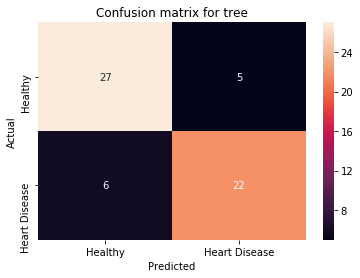

In [14]:
best_depth = 3
dtc = tree.DecisionTreeClassifier(max_depth=best_depth, random_state=0)
dtc = dtc.fit(x_train, y_train)
print("Testing accuracy for depth %d: %f" % (best_depth, accuracy((y_test != y_pred_test).sum(), num_test_points)))

from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots()
cm = confusion_matrix(y_test, y_pred_test)
df_cm = pd.DataFrame(cm, ['Healthy', 'Heart Disease'], ['Healthy', 'Heart Disease'])
sn.heatmap(df_cm, annot=True)
ax.set_ylim(2.0,0.0)
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
plt.title('Confusion matrix for tree')

plt.show()

#### c. Using the feature selection in assignment 1, select those 3 features from the data, vary the depth from d=3 to d=12
##### i. Print the TRAINING and TEST accuracy for each depth.

In [15]:
selected_attributes = [9,11,12] # oldpeak, ca, thal
x_train_selected = x_train[:, selected_attributes]
x_test_selected = x_test[:, selected_attributes]

tree_depth = []
incorrect_training = []
incorrect_testing = []
training_accuracy = []
testing_accuracy = []

for i in range(3,13):
    tree_depth.append(i)
    
    dtc = tree.DecisionTreeClassifier(max_depth=i, random_state=0) # criterion='entropy',
    dtc = dtc.fit(x_train_selected, y_train)

    y_pred_train = dtc.predict(x_train_selected)
    y_pred_test = dtc.predict(x_test_selected)



    num_train_incorrect = (y_train != y_pred_train).sum()
    num_test_incorrect = (y_test != y_pred_test).sum()
    
    incorrect_training.append(num_train_incorrect)
    incorrect_testing.append(num_test_incorrect)
    
    training_accuracy.append(accuracy(num_train_incorrect, num_train_points))
    testing_accuracy.append(accuracy(num_test_incorrect, num_test_points))
    
    
d = {'tree_depth': tree_depth, 'incorrect_training': incorrect_training, 'training_accuracy' : training_accuracy, 
       'incorrect_testing' : incorrect_testing, 'testing_accuracy' : testing_accuracy }

accuracy_frame = pd.DataFrame(data=d)

print('Training points: %d, Testing points: %d' % (num_train_points, num_test_points))
accuracy_frame

Training points: 236, Testing points: 60


,tree_depth,incorrect_training,training_accuracy,incorrect_testing,testing_accuracy
0,3,40,83.050847,11,81.666667
1,4,39,83.474576,12,80.000000
2,5,35,85.169492,12,80.000000
3,6,32,86.440678,14,76.666667
4,7,28,88.135593,16,73.333333
5,8,26,88.983051,16,73.333333
6,9,25,89.406780,18,70.000000
7,10,25,89.406780,16,73.333333
8,11,25,89.406780,16,73.333333
9,12,25,89.406780,16,73.333333


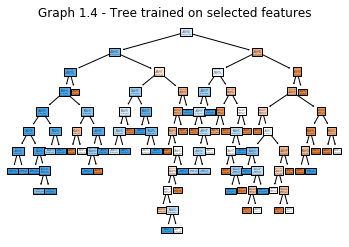

'Graph_1.4.png'

In [16]:
selected_feature_names={0:'oldpeak',1:'ca',2:'thal'}

tree.plot_tree(dtc, filled=True, class_names=c_names)
plt.title('Graph 1.4 - Tree trained on selected features')
plt.show()

dot_data = tree.export_graphviz(dtc, out_file=None, feature_names=selected_feature_names, class_names=c_names)
graph = graphviz.Source(dot_data)
graph.format='png'
graph.render("Graph_1.4")

##### ii. Did feature selection do anything to improve, or only worsen the results in this case? Hint: What features did the original tree choose compared to this tree? 

It worsened the results as it limited which features can be used to make choices. The first couple of decisions in the original tree were based on chosen features but as the tree got deeper choices were made on other features that the new tree doesn't have access to.

#### d. Decision surfaces
##### i. Plot the decision surface of a decision tree with the combination of 3 features you chose for the three cases: [0,1],[0,2],[1,2]. For example, use x axis as feature 0 and y axis as feature 1, then (feature 0, feature 2), then (feature 1, feature 2). 

**Note that for best performance, the decision surface may be more than two dimensions and
involve multiple features (for example heartrate, age, and vessels) ** 

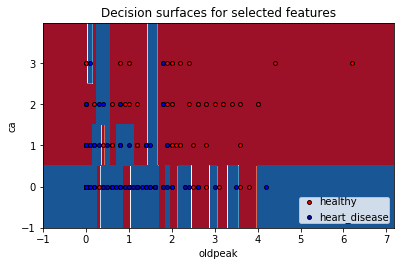

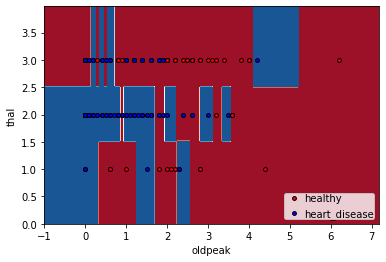

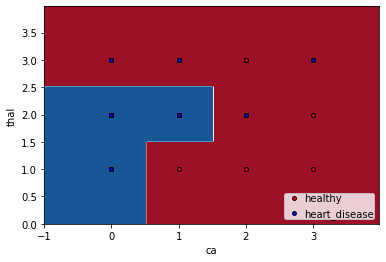

In [17]:
n_classes = 2
plot_colors = "rb"
plot_step = 0.02

plt.title("Decision surfaces for selected features")

for pairidx, pair in enumerate([[9, 11], [9, 12], [11, 12]]):
    x_selected = x_train[:, pair]

    dtc = tree.DecisionTreeClassifier().fit(x_selected, y_train)

    x_min, x_max = x_selected[:, 0].min() - 1, x_selected[:, 0].max() + 1
    y_min, y_max = x_selected[:, 1].min() - 1, x_selected[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = dtc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu)

    plt.xlabel(feature_names[pair[0]])
    plt.ylabel(feature_names[pair[1]])

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_train == i)
        plt.scatter(x_selected[idx, 0], x_selected[idx, 1], c=color, label=c_names[i],
                    cmap=plt.cm.RdBu, edgecolor='black', s=15)
    
    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    plt.axis("tight")
    plt.show()




#### e. What assumptions did we make for this model?

Using a decision tree makes the assumption that the attributes are directly related to each other. In any given path a decision is based on some value of an attribute only for a particular value for another attribute used in the decision above.

#### f. Explain or draw an example of how a binary decision tree can be used for categorical data with more than 2 categories in an attribute feature (example: for an attribute height with 3 categories: short, medium, large), using more than one split/depth. 

A binary decision tree can make choices with more than two categories by only focusing on one category at each split. One branch leads to one category and the other leads to all of the other categories. Then on the next split it would filter out another category. 

Ex.
```python
 if x 
 /   \
A     if y 
      /   \
     B     C
```

#### g. From your observations, explain cases why we should specify a max_depth for the model.

Specifying a maximum depth helps with preventing overfitting. As seen in the results of the tree trained on only three attributes, accuracy decreased as the depth increased due to this issue.

#### h. What other approaches, or modifications could we have done in your decision tree model? In other words, what parameters can we change? (Note the suggested revisions may not necessarily be implemented in the library yet)

We could modify the model so that the tree is pruned in order to prevent overfitting. We could specify values for the minimum number of samples that are required to make a split or to create a leaf node. We could also specify the maximum number of leaf nodes that are allowed in the tree.

## Appendix A

### Graph 1.1 - Decision Tree

<img src="Graph_1.1.png">

### Graph 1.2 - Tree with Depth 3

<img src="Graph_1.2.png">

### Graph 1.3 - Tree with Depth 5

<img src="Graph_1.3.png">

### Graph 1.4 - Tree Trained on Selected Features ("ca", "oldpeak", "thal")

<img src="Graph_1.4.png">